5 Baris Pertama:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

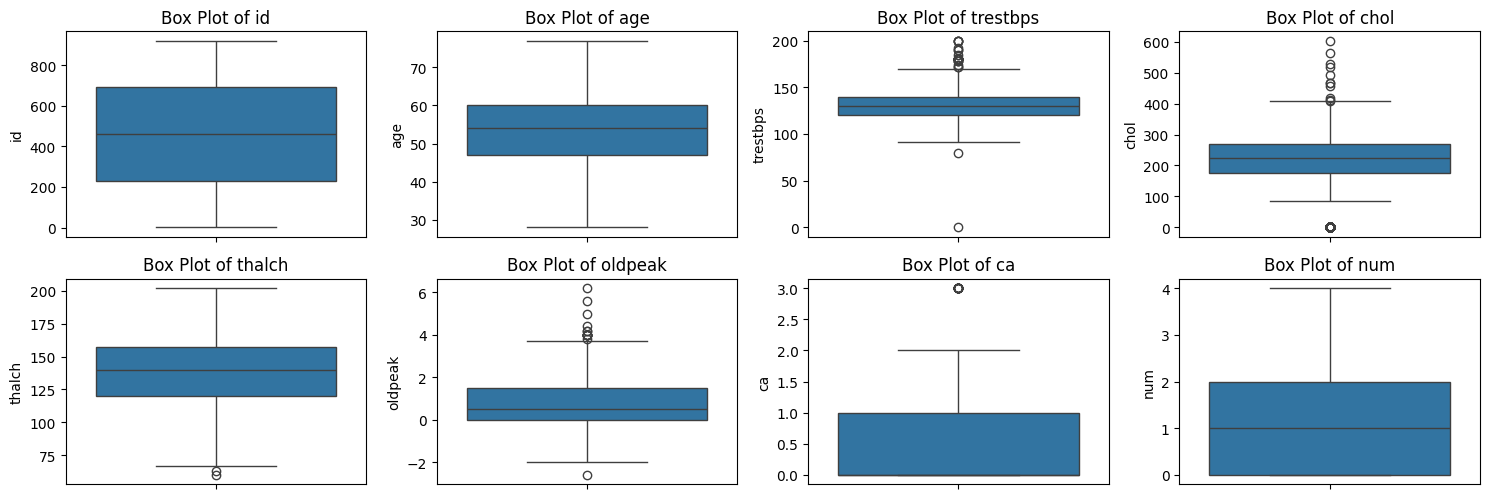


Mean:
id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64

Median:
id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64

Mode:
id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64

Standard Deviation:
id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64

Variance:
id          70610.000000
age            88.824691
trestbps      363.515007
chol        12272.387943
thalch        672.171813
oldpeak         1.190775
ca              0.875447
num             1.305748
dtype: float64

Skew

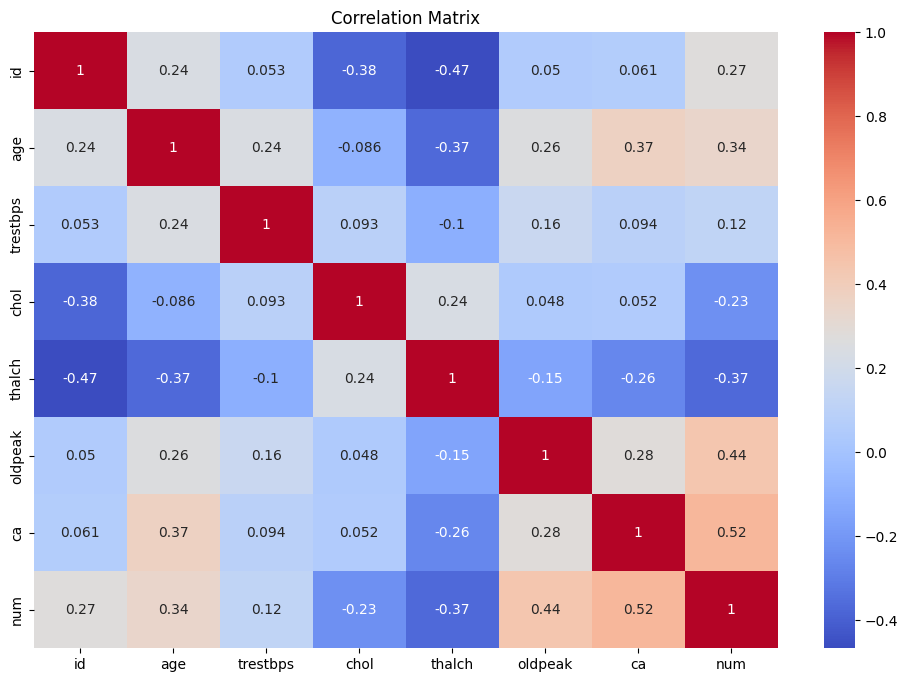

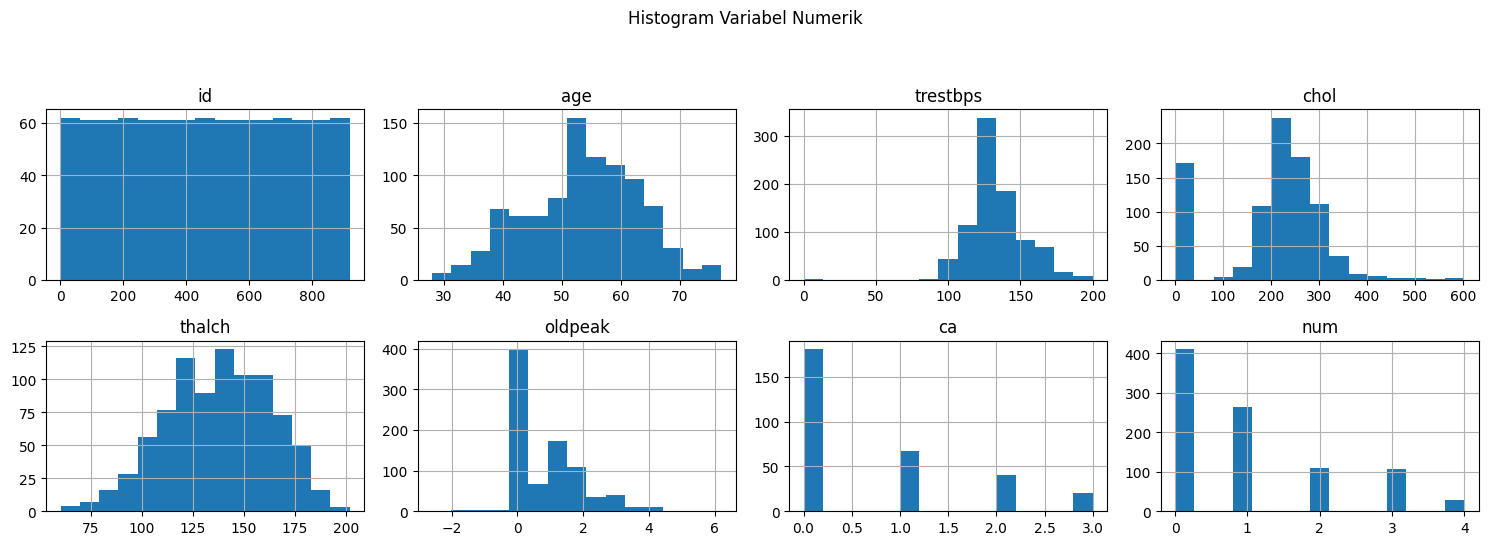

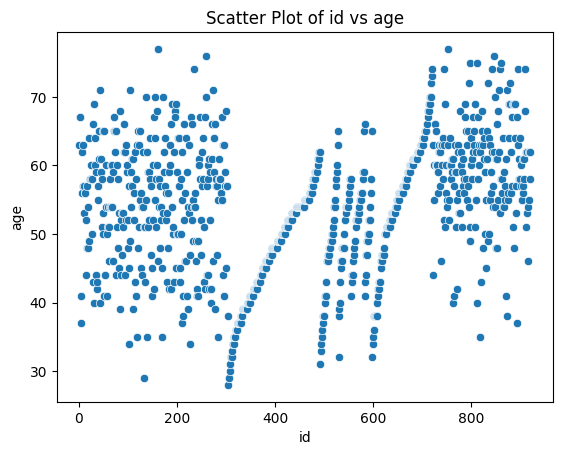

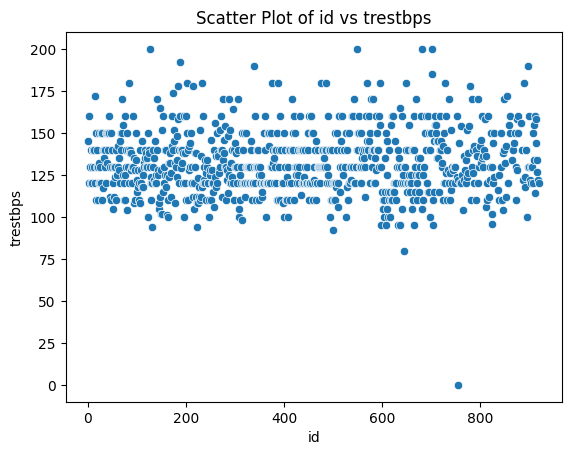

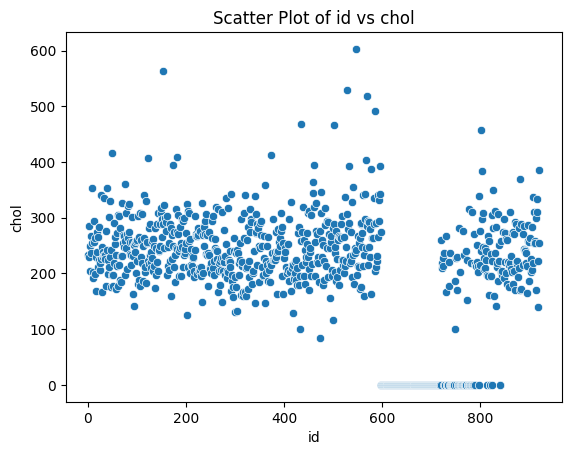

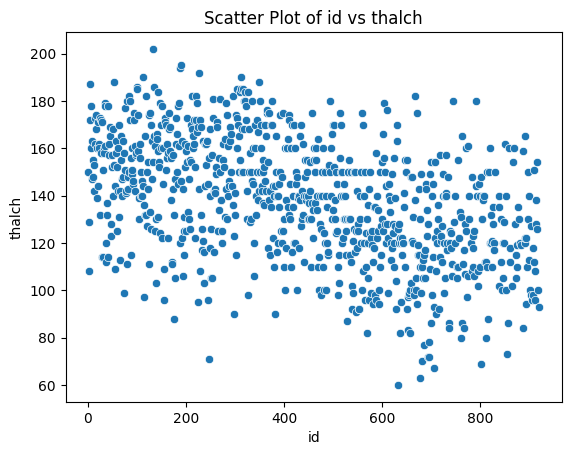

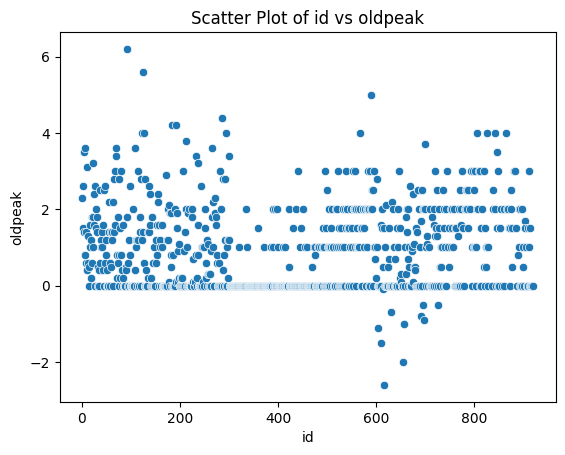

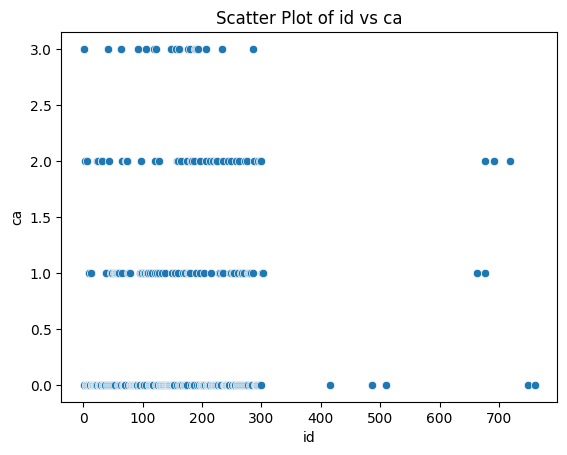

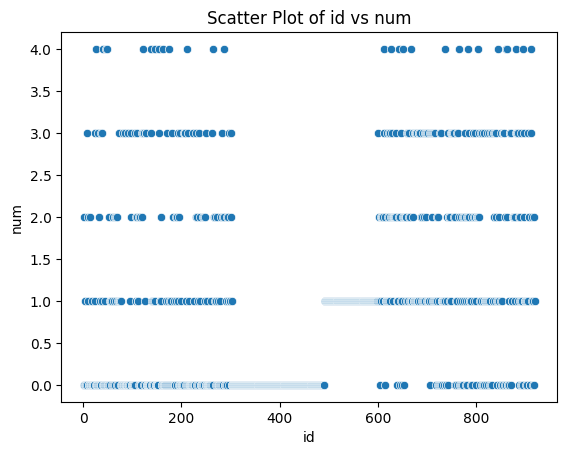

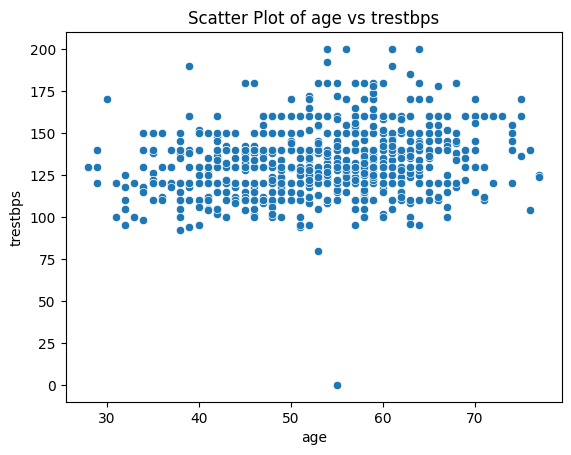

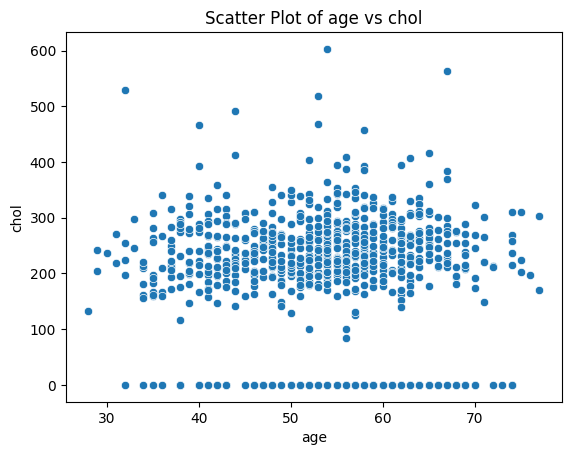

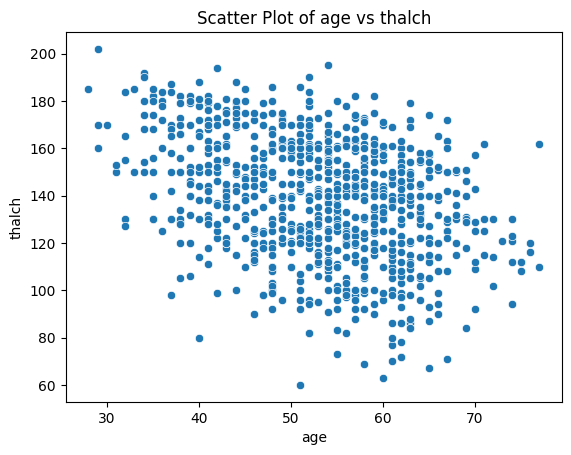

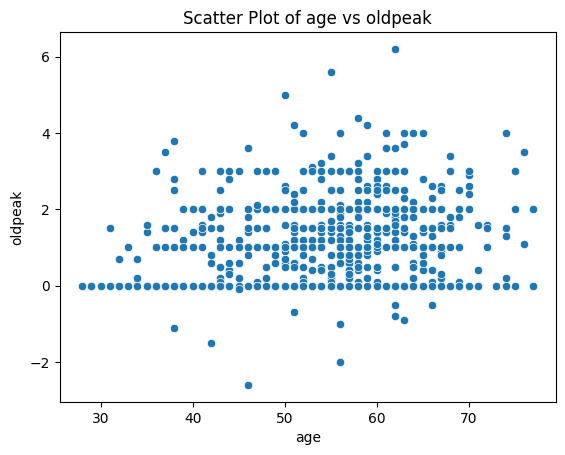

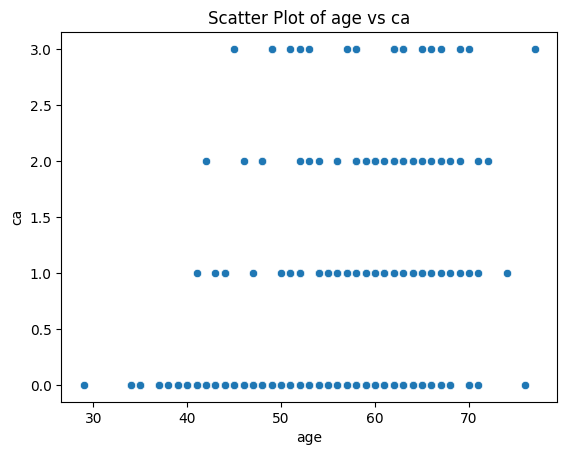

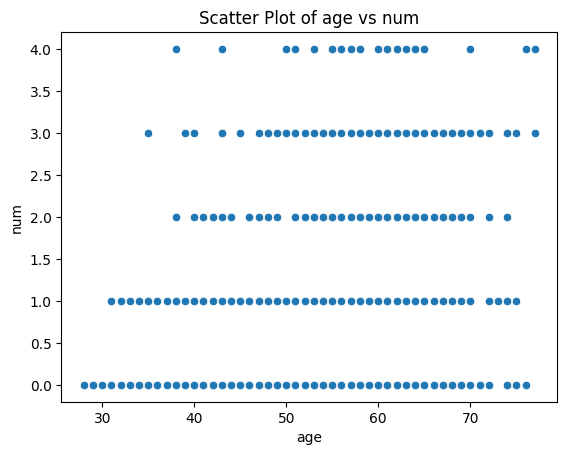

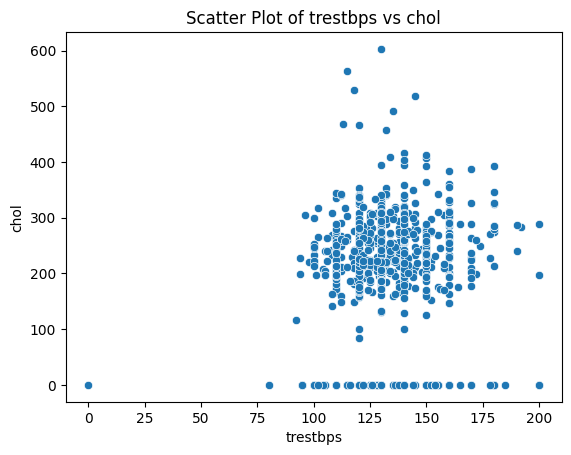

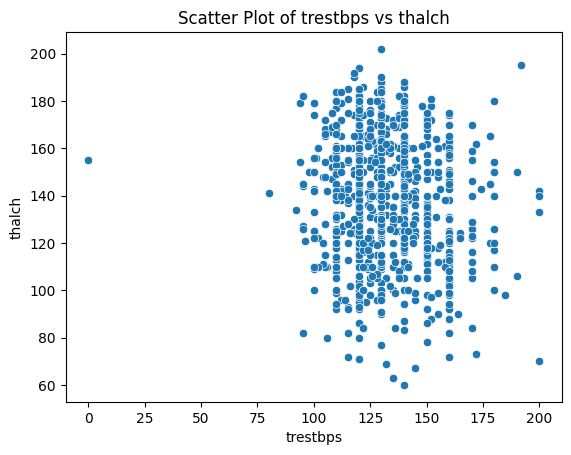

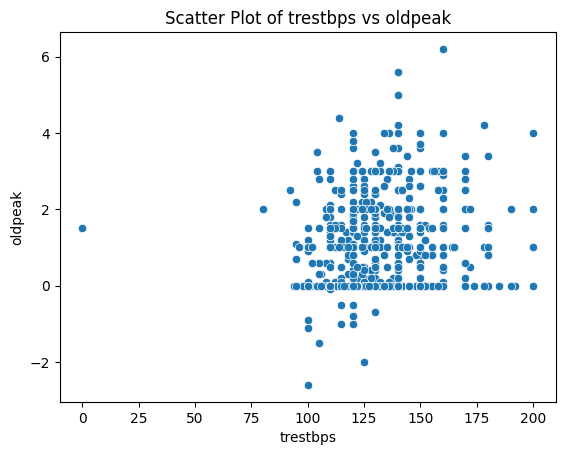

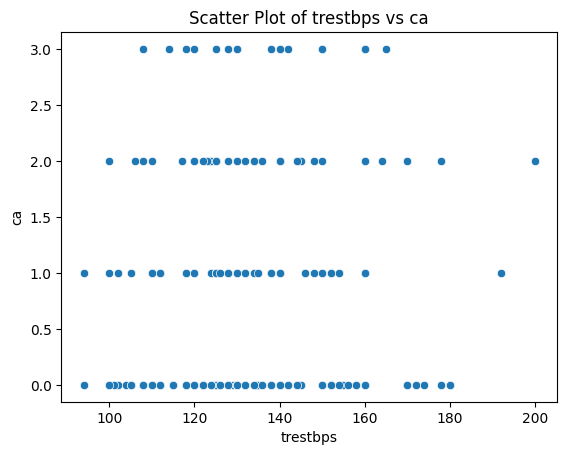

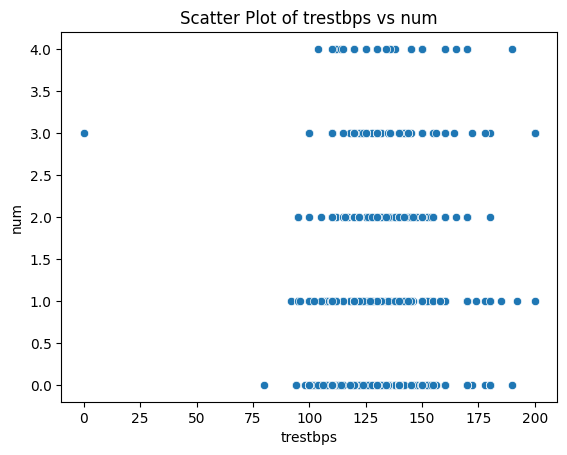

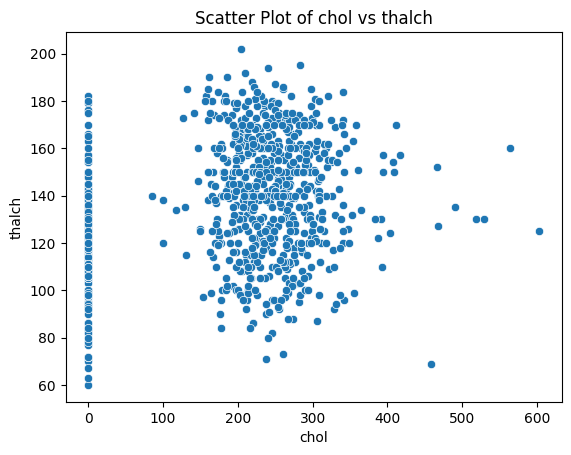

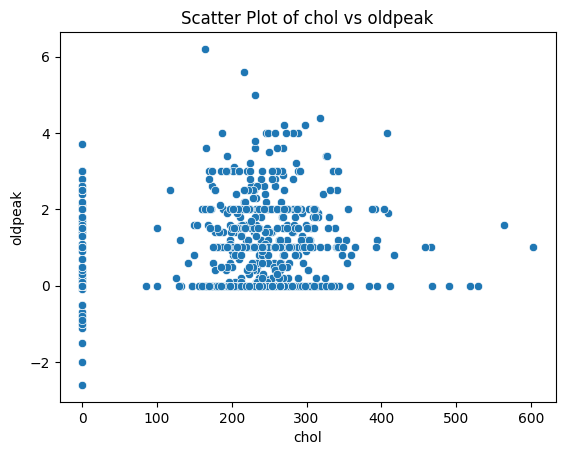

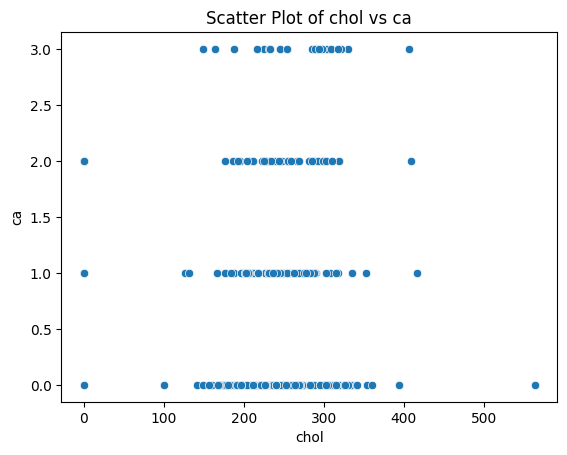

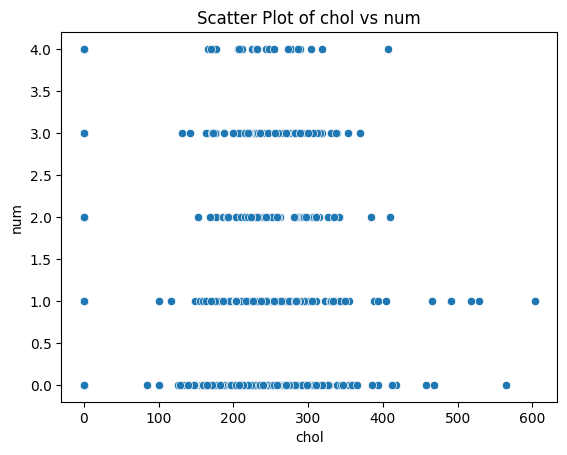

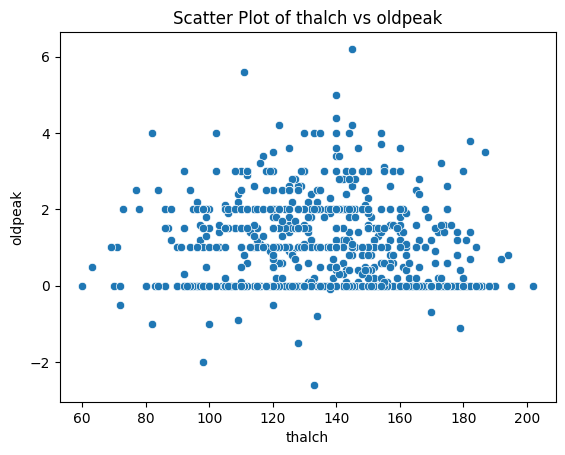

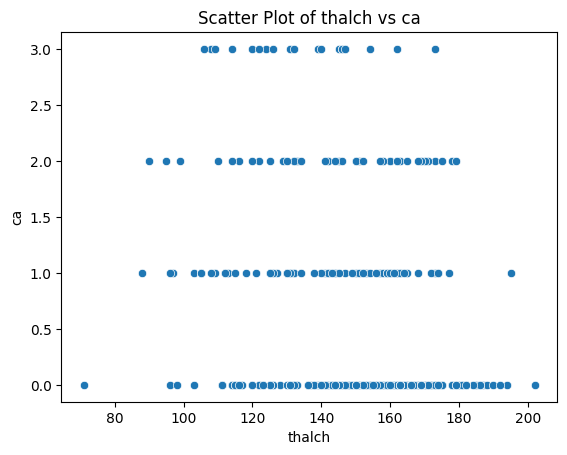

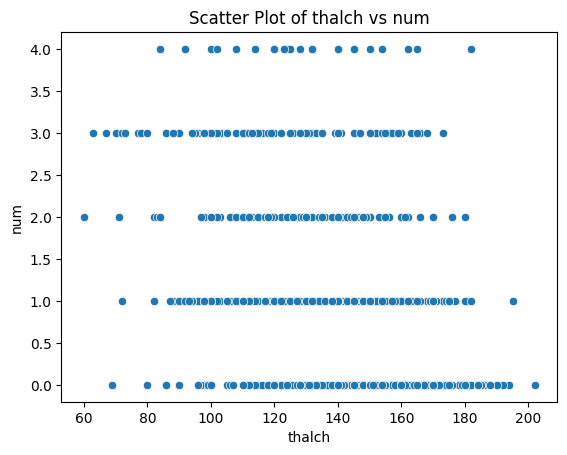

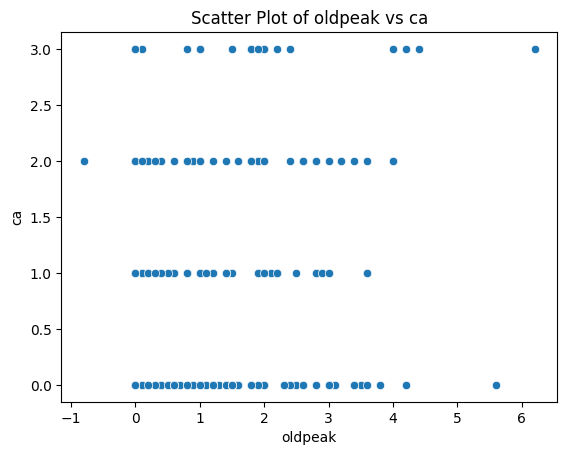

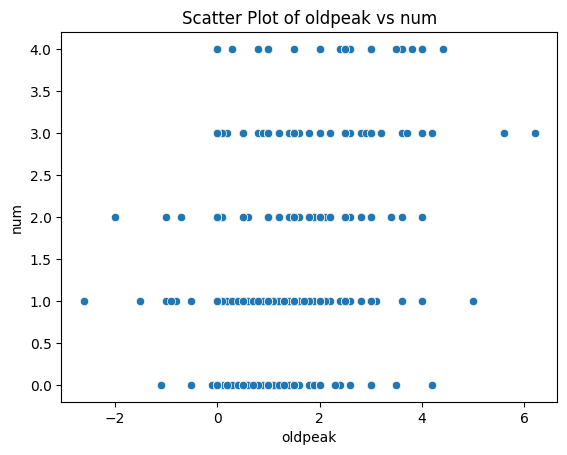

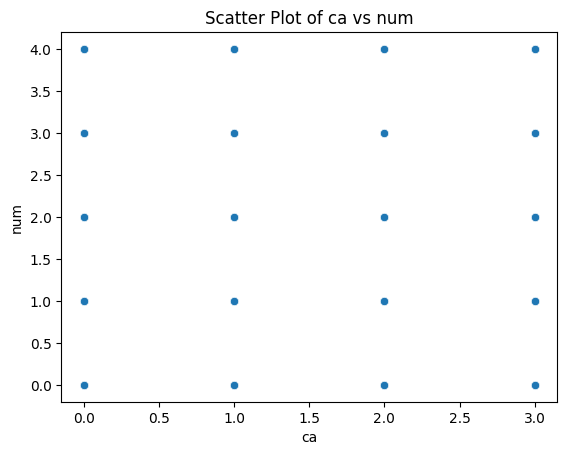

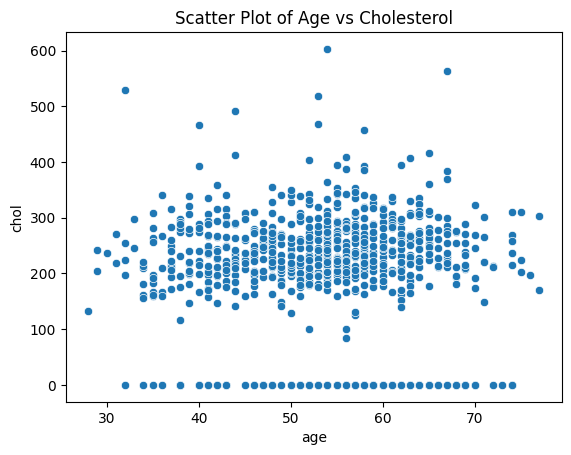


Outliers for id:
0

Outliers for age:
0

Outliers for trestbps:
28

Outliers for chol:
183

Outliers for thalch:
2

Outliers for oldpeak:
16

Outliers for ca:
20

Outliers for num:
0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Dataset
fileLocation = r"C:\Data Mining\heart_disease_uci.csv" 
df = pd.read_csv(fileLocation)

# 2. Eksplorasi Awal
## Menampilkan 5 baris pertama
print("5 Baris Pertama:")
print(df.head())

## Menampilkan 5 baris terakhir
print("\n5 Baris Terakhir:")
print(df.tail())

## Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())

## Menampilkan statistik deskripsi dasar
print("\nStatistik Deskriptif Dasar:")
print(df.describe())

## Menampilkan jumlah nilai missing per kolom
print("\nJumlah Nilai Missing per Kolom:")
print(df.isnull().sum())

# 3. Identifikasi Outliers menggunakan Box Plot
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15,10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# 4. Statistik Deskriptif
## Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

## Mean
print("\nMean:")
print(numeric_df.mean())

## Median
print("\nMedian:")
print(numeric_df.median())

## Mode
print("\nMode:")
print(numeric_df.mode().iloc[0])

## Standar Deviasi
print("\nStandard Deviation:")
print(numeric_df.std())

## Variansi
print("\nVariance:")
print(numeric_df.var())

## Skewness dan Kurtosis
print("\nSkewness:")
print(numeric_df.skew())

print("\nKurtosis:")
print(numeric_df.kurtosis())

# 5. Korelasi Antar Variabel
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Visualisasi Data

## Membuat histogram untuk setiap variabel numerik
numeric_df.hist(bins=15, figsize=(15,10), layout=(4,4))
plt.suptitle('Histogram Variabel Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Untuk menghindari overlap judul
plt.show()

## Scatter Plot untuk pasangan variabel dengan korelasi tinggi
threshold = 0.5
high_corr = correlation_matrix.abs() > threshold
high_corr = high_corr.where(np.triu(np.ones(high_corr.shape), k=1).astype(bool))
pairs = high_corr.stack().index.tolist()

for pair in pairs:
    if 'target' in df.columns:
        sns.scatterplot(x=pair[0], y=pair[1], data=df, hue='target')
        plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
        plt.show()
    else:
        sns.scatterplot(x=pair[0], y=pair[1], data=df)
        plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
        plt.show()

## Misalkan 'age' dan 'chol' memiliki korelasi tinggi
if 'age' in df.columns and 'chol' in df.columns:
    sns.scatterplot(x='age', y='chol', data=df, hue='target' if 'target' in df.columns else None)
    plt.title('Scatter Plot of Age vs Cholesterol')
    plt.show()
else:
    print("Kolom 'age' atau 'chol' tidak ditemukan dalam dataset.")

## Identifikasi Outliers
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutliers for {column}:")
    print(outliers.shape[0])
